Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)


Training model...
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 36ms/step - accuracy: 0.8344 - loss: 0.5147 - val_accuracy: 0.9832 - val_loss: 0.0493
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 32ms/step - accuracy: 0.9751 - loss: 0.0911 - val_accuracy: 0.9869 - val_loss: 0.0408
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - accuracy: 0.9818 - loss: 0.0648 - val_accuracy: 0.9896 - val_loss: 0.0361
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.9874 - loss: 0.0471 - val_accuracy: 0.9882 - val_loss: 0.0384
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 32ms/step - accuracy: 0.9889 - loss: 0.0410 - val_accuracy: 0.9925 - val_loss: 0.0287
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.9910 - loss: 0.0323 - val_accuracy: 0.9917 - val_loss: 0.0309
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 31ms/step - accuracy: 0.9925 - loss: 0.0272 - val_accuracy: 0.9913 - val_loss: 0.0354
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step -

Saved sample predictions plot
Model saved to models/mnist_model.h5


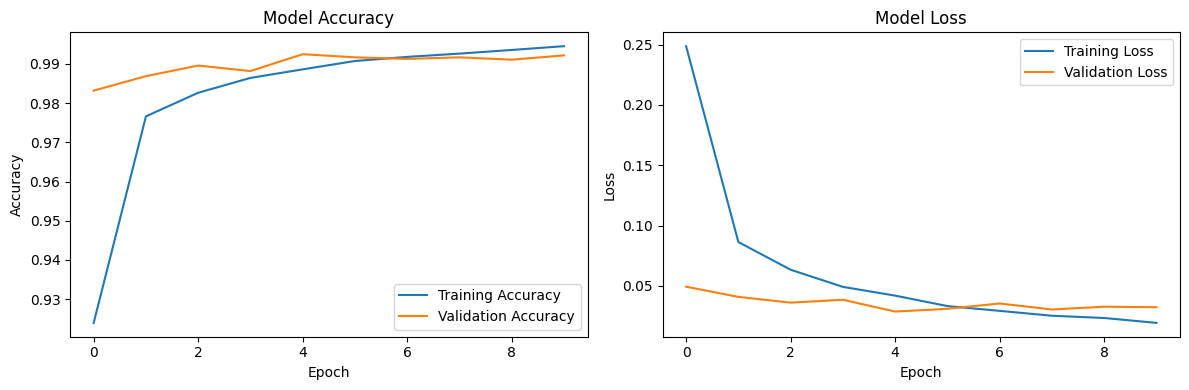

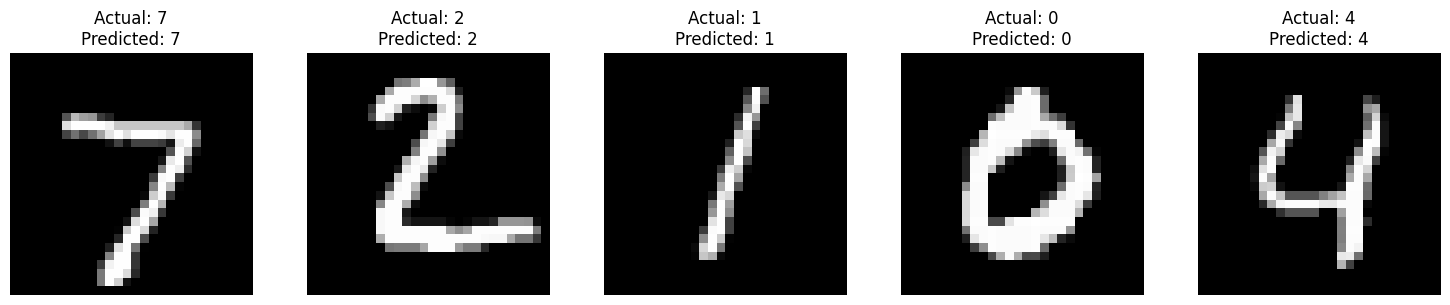

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import os

def main():
    # Create models directory if needed
    os.makedirs('../models', exist_ok=True)
    # Create images directory if needed
    os.makedirs('../images', exist_ok=True) # Add this line

    # Load and preprocess data
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0
    X_train = X_train.reshape(-1, 28, 28, 1)
    X_test = X_test.reshape(-1, 28, 28, 1)
    y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
    y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

    print(f"Training data shape: {X_train.shape}")
    print(f"Test data shape: {X_test.shape}")

    # Build model
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

    # Compile model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Display model architecture
    model.summary()

    # Train model
    print("\nTraining model...")
    history = model.fit(X_train, y_train_cat,
                        epochs=10,
                        batch_size=32,
                        validation_data=(X_test, y_test_cat),
                        verbose=1)

    # Evaluate model
    test_loss, test_accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
    print(f"\nTest Accuracy: {test_accuracy:.4f}")

    # Plot training history
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.savefig('../images/mnist_training_history.png')
    print("Saved training history plot")

    # Visualize predictions
    print("\nMaking sample predictions...")
    predictions = model.predict(X_test[:5])
    predicted_classes = np.argmax(predictions, axis=1)

    plt.figure(figsize=(15, 3))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
        plt.title(f'Actual: {y_test[i]}\nPredicted: {predicted_classes[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('../images/mnist_predictions.png')
    print("Saved sample predictions plot")

    # Save model
    model.save('../models/mnist_model.h5')
    print("Model saved to models/mnist_model.h5")

if __name__ == "__main__":
    main()